## EDA of subreddit classification!



In [ ]:
import pandas as pd
df = pd.read_csv('full_combined_data.csv') #This is the CSV file has all combined subreddit data

<ipython-input-2-e92985fddf90>:2: DtypeWarning: Columns (7,8,10,11,30,49,55,73,80,91,107,117) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('full_combined_data.csv')


In [ ]:
df.shape

(35444, 118)

In [ ]:
df.head(5)

,_meta,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,...,is_gallery,link_flair_template_id,media_metadata,url_overridden_by_dest,post_hint,preview,crosspost_parent,crosspost_parent_list,author_cakeday,poll_data
0,"{'removal_type': 'moderator', 'retrieved_2nd_o...",[],False,NaN,NaN,False,Sorry_Lettuce_507,NaN,NaN,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'retrieved_2nd_on': 1706876185},[],False,NaN,NaN,False,RichardMeans,NaN,NaN,[],...,1.0,8565b9c2-363c-11e3-b706-12313d21c4ee,NaN,https://www.reddit.com/gallery/1afx9e3,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'is_edited': True, 'retrieved_2nd_on': 170687...",[],False,NaN,NaN,False,Prudent_Storm_3781,NaN,NaN,[],...,NaN,63ab44d8-3640-11e3-8665-12313d21c4ee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'retrieved_2nd_on': 1706876771},[],False,NaN,NaN,False,wildchildplaygroup,NaN,NaN,[],...,NaN,63ab44d8-3640-11e3-8665-12313d21c4ee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'removal_type': 'moderator', 'retrieved_2nd_o...",[],False,NaN,NaN,False,mirzaeian,NaN,NaN,[],...,NaN,63ab44d8-3640-11e3-8665-12313d21c4ee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
selected_columns = [
    'author', 'created', 'domain', 'downs', 'link_flair_text',
    'num_comments', 'over_18', 'permalink', 'score', 'selftext',
    'subreddit_subscribers', 'title', 'ups', 'upvote_ratio', 'url','subreddit'
]
#pandas_df = pd.read_csv('combined_data.csv', usecols=selected_columns)
pandas_df=df[selected_columns]

pandas_df.head(5)

,author,created,domain,downs,link_flair_text,num_comments,over_18,permalink,score,selftext,subreddit_subscribers,title,ups,upvote_ratio,url,subreddit
0,Sorry_Lettuce_507,1706746097,self.travel,0,NaN,4,False,/r/travel/comments/1afx367/cant_decide_where_t...,1,I’m from the U.S for whenever I travel it’s ve...,9372332,Can’t decide where to go,1,0.60,https://www.reddit.com/r/travel/comments/1afx3...,travel
1,RichardMeans,1706746578,reddit.com,0,Images,0,False,/r/travel/comments/1afx9e3/it_a_good_day_here/,1,NaN,9372310,It a good day here,1,1.00,https://www.reddit.com/gallery/1afx9e3,travel
2,Prudent_Storm_3781,1706746686,self.travel,0,Question,52,False,/r/travel/comments/1afxarw/italy_advicewhat_to...,4,I’m going to hit Rome and sorrento for two wee...,9372311,Italy advice…what to cut out? First trip,4,0.65,https://www.reddit.com/r/travel/comments/1afxa...,travel
3,wildchildplaygroup,1706747163,self.travel,0,Question,1,False,/r/travel/comments/1afxh16/should_i_take_dukor...,1,[removed],9372289,Should I take Dukoral before Mexico trip?,1,1.00,https://www.reddit.com/r/travel/comments/1afxh...,travel
4,mirzaeian,1706747170,self.travel,0,Question,11,False,/r/travel/comments/1afxh4s/is_there_a_map_that...,0,I do travel a lot but I am not a fan of touris...,9372289,is there a map that I can find travel destinat...,0,0.44,https://www.reddit.com/r/travel/comments/1afxh...,travel


In [ ]:
pandas_df.shape

(35444, 16)

In [ ]:
pandas_df.columns

Index(['author', 'created', 'domain', 'downs', 'link_flair_text',
       'num_comments', 'over_18', 'permalink', 'score', 'selftext',
       'subreddit_subscribers', 'title', 'ups', 'upvote_ratio', 'url',
       'subreddit'],
      dtype='object')

In [ ]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35444 entries, 0 to 35443
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   author                 35444 non-null  object 
 1   created                35444 non-null  int64  
 2   domain                 35346 non-null  object 
 3   downs                  35444 non-null  int64  
 4   link_flair_text        22929 non-null  object 
 5   num_comments           35444 non-null  int64  
 6   over_18                35444 non-null  bool   
 7   permalink              35444 non-null  object 
 8   score                  35444 non-null  int64  
 9   selftext               29974 non-null  object 
 10  subreddit_subscribers  35444 non-null  int64  
 11  title                  35444 non-null  object 
 12  ups                    35444 non-null  int64  
 13  upvote_ratio           35444 non-null  float64
 14  url                    35346 non-null  object 
 15  su

In [ ]:
pandas_df.drop(columns=['permalink', 'url','domain'], inplace=True)
pandas_df.head(5)

<ipython-input-9-fa12b4d37401>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandas_df.drop(columns=['permalink', 'url','domain'], inplace=True)


,author,created,downs,link_flair_text,num_comments,over_18,score,selftext,subreddit_subscribers,title,ups,upvote_ratio,subreddit
0,Sorry_Lettuce_507,1706746097,0,NaN,4,False,1,I’m from the U.S for whenever I travel it’s ve...,9372332,Can’t decide where to go,1,0.60,travel
1,RichardMeans,1706746578,0,Images,0,False,1,NaN,9372310,It a good day here,1,1.00,travel
2,Prudent_Storm_3781,1706746686,0,Question,52,False,4,I’m going to hit Rome and sorrento for two wee...,9372311,Italy advice…what to cut out? First trip,4,0.65,travel
3,wildchildplaygroup,1706747163,0,Question,1,False,1,[removed],9372289,Should I take Dukoral before Mexico trip?,1,1.00,travel
4,mirzaeian,1706747170,0,Question,11,False,0,I do travel a lot but I am not a fan of touris...,9372289,is there a map that I can find travel destinat...,0,0.44,travel


In [ ]:
# Convert 'created' to datetime from UNIX timestamp format
pandas_df['created'] = pd.to_datetime(pandas_df['created'], unit='s')

<ipython-input-10-33f845ad1dd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandas_df['created'] = pd.to_datetime(pandas_df['created'], unit='s')


In [ ]:
pandas_df.isnull().sum()

author                       0
created                      0
downs                        0
link_flair_text          12515
num_comments                 0
over_18                      0
score                        0
selftext                  5470
subreddit_subscribers        0
title                        0
ups                          0
upvote_ratio                 0
subreddit                    0
dtype: int64

In [ ]:
pandas_df.head(5)

,author,created,downs,link_flair_text,num_comments,over_18,score,selftext,subreddit_subscribers,title,ups,upvote_ratio,subreddit
0,Sorry_Lettuce_507,2024-02-01 00:08:17,0,NaN,4,False,1,I’m from the U.S for whenever I travel it’s ve...,9372332,Can’t decide where to go,1,0.60,travel
1,RichardMeans,2024-02-01 00:16:18,0,Images,0,False,1,NaN,9372310,It a good day here,1,1.00,travel
2,Prudent_Storm_3781,2024-02-01 00:18:06,0,Question,52,False,4,I’m going to hit Rome and sorrento for two wee...,9372311,Italy advice…what to cut out? First trip,4,0.65,travel
3,wildchildplaygroup,2024-02-01 00:26:03,0,Question,1,False,1,[removed],9372289,Should I take Dukoral before Mexico trip?,1,1.00,travel
4,mirzaeian,2024-02-01 00:26:10,0,Question,11,False,0,I do travel a lot but I am not a fan of touris...,9372289,is there a map that I can find travel destinat...,0,0.44,travel


## Summary Statistics

In [ ]:
pandas_df.describe()

,created,downs,num_comments,score,subreddit_subscribers,ups,upvote_ratio
count,35444,35444.0,35444.000000,35444.000000,3.544400e+04,35444.000000,35444.000000
mean,2024-02-15 10:19:41.260495616,0.0,12.203081,11.468344,1.110546e+07,11.468344,0.767577
min,2024-02-01 00:03:48,0.0,0.000000,0.000000,3.380350e+05,0.000000,0.030000
25%,2024-02-07 20:52:01,0.0,0.000000,0.000000,5.909946e+06,0.000000,0.500000
50%,2024-02-15 12:13:03.500000,0.0,2.000000,1.000000,9.516154e+06,1.000000,0.920000
75%,2024-02-22 18:58:01.249999872,0.0,7.000000,1.000000,1.870602e+07,1.000000,1.000000
max,2024-02-29 23:58:57,0.0,4333.000000,8336.000000,1.878354e+07,8336.000000,1.000000
std,NaN,0.0,65.844124,109.156104,6.390045e+06,109.156104,0.267794


since the downs column contains only zeros, it doesn't contribute useful information, so it makes sense to drop it from the analysis. score column is  the number of ups minus downs, and given that downs are zero, score'\ and ups are effectively the same. Therefore, you can drop the ups column and retain the score column for  analysis

In [ ]:
pandas_df.drop(columns=['ups', 'downs'], inplace=True)
pandas_df.head(5)

<ipython-input-18-4bcae8c71f22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandas_df.drop(columns=['ups', 'downs'], inplace=True)


,author,created,link_flair_text,num_comments,over_18,score,selftext,subreddit_subscribers,title,upvote_ratio,subreddit
0,Sorry_Lettuce_507,2024-02-01 00:08:17,NaN,4,False,1,I’m from the U.S for whenever I travel it’s ve...,9372332,Can’t decide where to go,0.60,travel
1,RichardMeans,2024-02-01 00:16:18,Images,0,False,1,NaN,9372310,It a good day here,1.00,travel
2,Prudent_Storm_3781,2024-02-01 00:18:06,Question,52,False,4,I’m going to hit Rome and sorrento for two wee...,9372311,Italy advice…what to cut out? First trip,0.65,travel
3,wildchildplaygroup,2024-02-01 00:26:03,Question,1,False,1,[removed],9372289,Should I take Dukoral before Mexico trip?,1.00,travel
4,mirzaeian,2024-02-01 00:26:10,Question,11,False,0,I do travel a lot but I am not a fan of touris...,9372289,is there a map that I can find travel destinat...,0.44,travel


##  Numerical and Categorical Column Distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

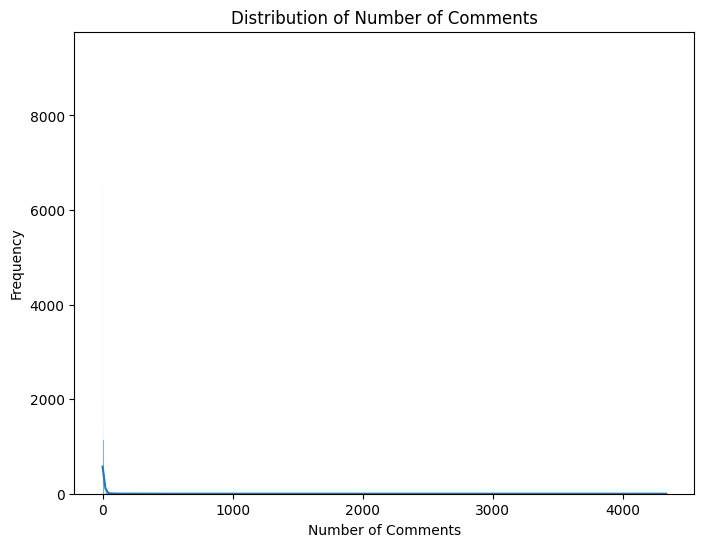

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(pandas_df['num_comments'], kde=True)
plt.title('Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()


In [ ]:
data_df= pandas_df

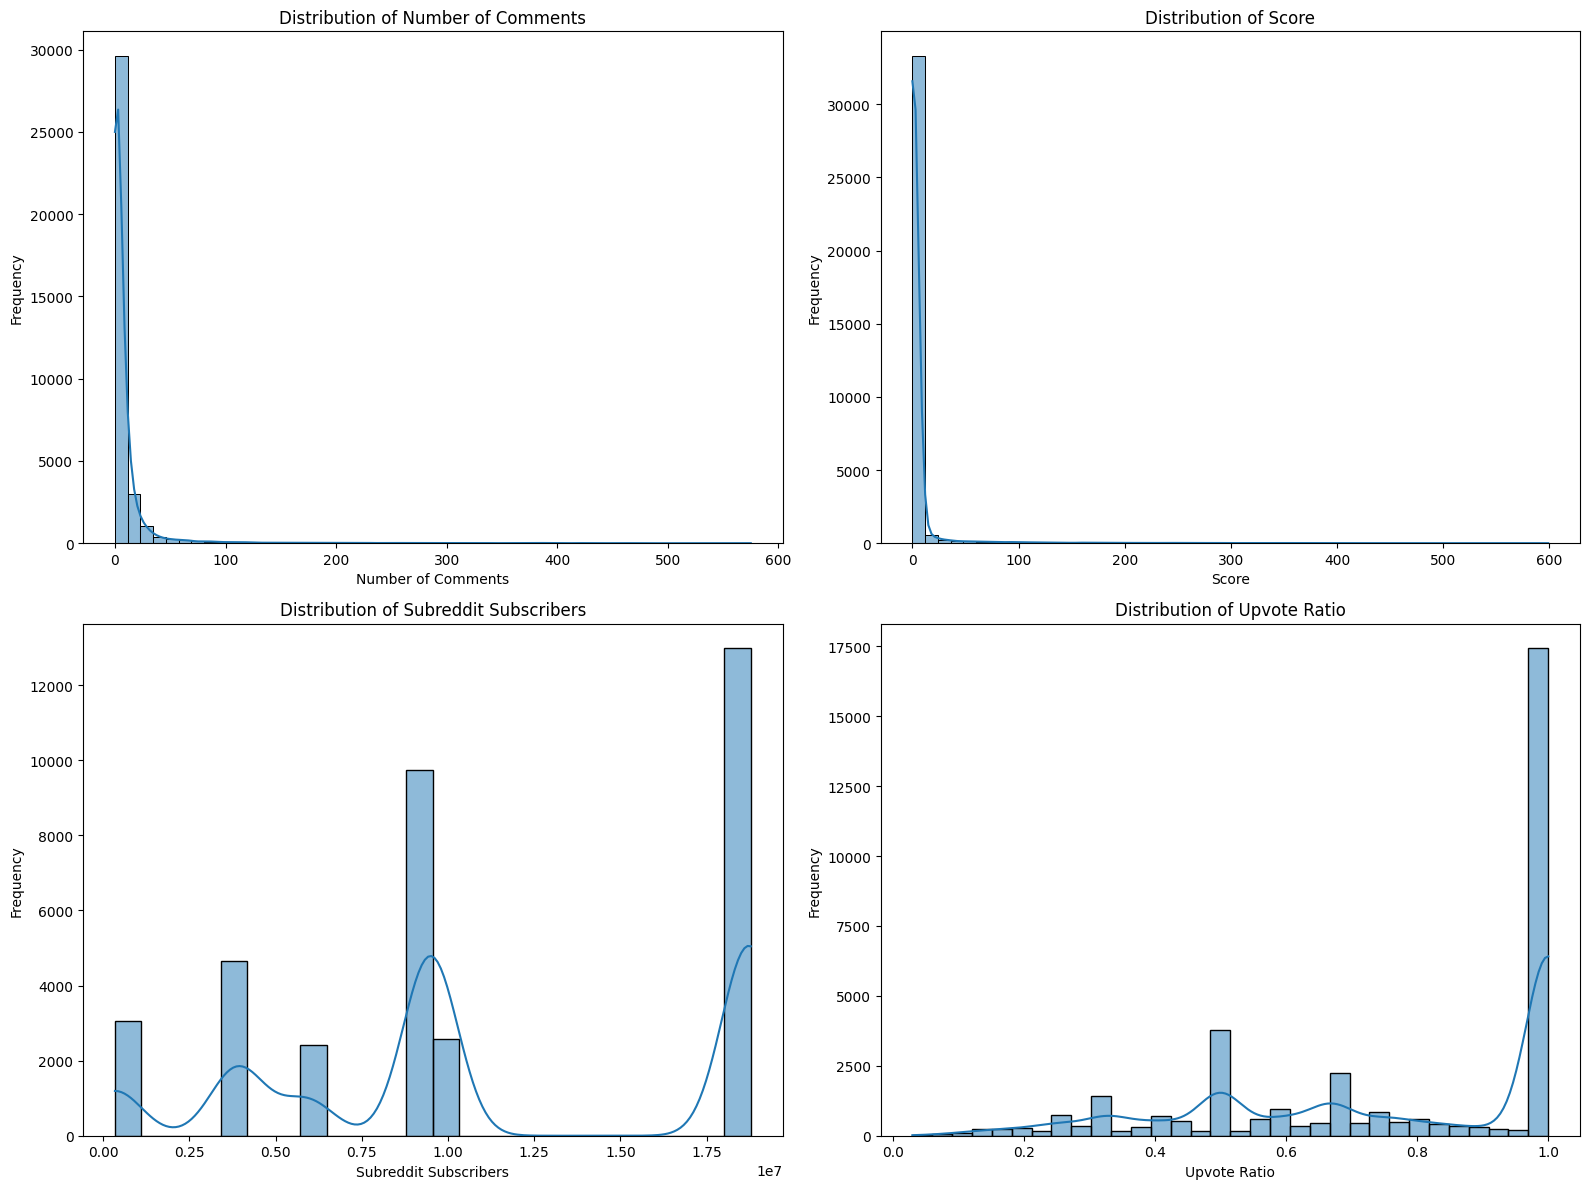

In [ ]:
# Set the size of the overall figure
plt.figure(figsize=(16, 12))

# First plot: Distribution of Number of Comments (limited to < 600 for clarity)
plt.subplot(2, 2, 1)
sns.histplot(data_df[data_df['num_comments'] < 600]['num_comments'], bins=50, kde=True)
plt.title('Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')

# Second plot: Distribution of Score (limited to < 600 for clarity)
plt.subplot(2, 2, 2)
sns.histplot(data_df[data_df['score'] < 600]['score'], bins=50, kde=True)
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Third plot: Distribution of Subreddit Subscribers
plt.subplot(2, 2, 3)
sns.histplot(data_df['subreddit_subscribers'], kde=True)
plt.title('Distribution of Subreddit Subscribers')
plt.xlabel('Subreddit Subscribers')
plt.ylabel('Frequency')

# Fourth plot: Distribution of Upvote Ratio
plt.subplot(2, 2, 4)
sns.histplot(data_df['upvote_ratio'], kde=True)
plt.title('Distribution of Upvote Ratio')
plt.xlabel('Upvote Ratio')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

## Correlation Analysis

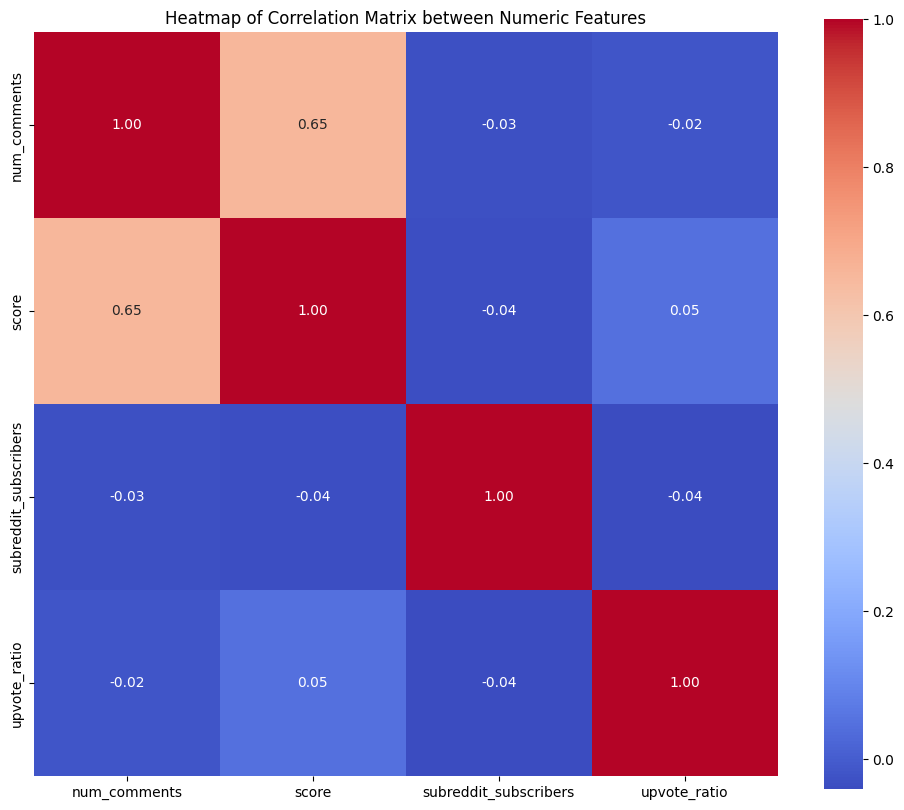

In [ ]:
correlation_matrix = data_df.select_dtypes(include=['float64', 'int64']).corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation Matrix between Numeric Features')
plt.show()

The positive correlation between num_comments and score which is 0.65, suggests that posts with more comments and may also be the ones that receive good score.

the number of subscribers doesn't necessarily predict how many comments a post will get or its score.

The upvote_ratio does not seem to have a strong linear relationship with the number of comments or the score of the posts.

## Categorical Distribution

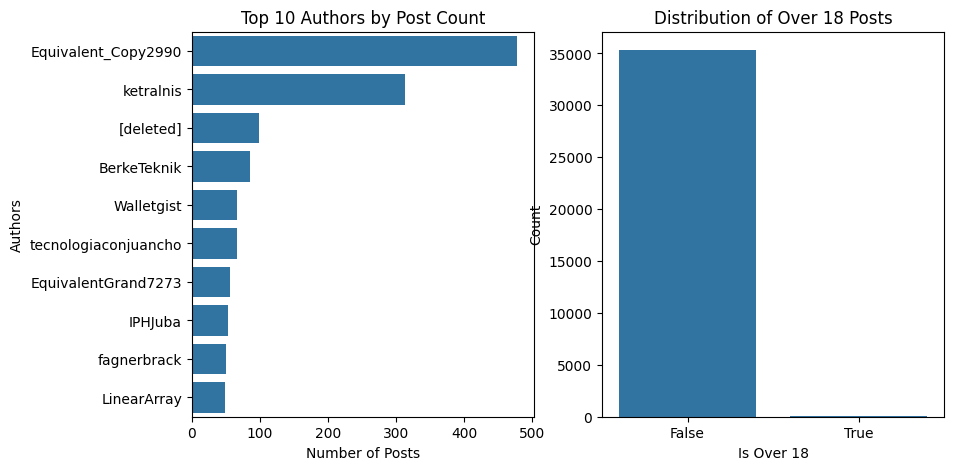

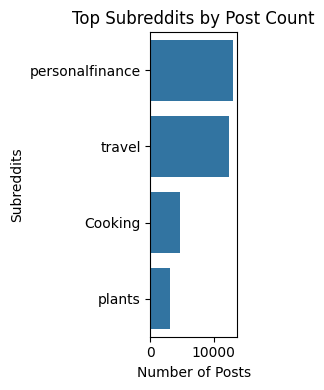

<Figure size 640x480 with 0 Axes>

In [ ]:
# Bar plots for categorical variables
categorical_cols = ['author', 'over_18', 'subreddit']
plt.figure(figsize=(15, 5))

# Frequency of posts by authors
author_counts = df['author'].value_counts().head(10)
plt.subplot(1, 3, 1)
sns.barplot(x=author_counts.values, y=author_counts.index)
plt.title('Top 10 Authors by Post Count')
plt.xlabel('Number of Posts')
plt.ylabel('Authors')

# Distribution of over_18 posts
over_18_counts = df['over_18'].value_counts()
plt.subplot(1, 3, 2)
sns.barplot(x=over_18_counts.index, y=over_18_counts.values)
plt.title('Distribution of Over 18 Posts')
plt.xlabel('Is Over 18')
plt.ylabel('Count')

# If there's more than one subreddit, visualize post count by subreddit
filtered_df = df[df['subreddit'] != 'programming']

# Check if there are still multiple unique subreddits left
if filtered_df['subreddit'].nunique() > 1:
    subreddit_counts = filtered_df['subreddit'].value_counts().head(10)

    plt.figure(figsize=(6, 4))
    plt.subplot(1, 3, 3)
    sns.barplot(x=subreddit_counts.values, y=subreddit_counts.index)
    plt.title('Top Subreddits by Post Count')
    plt.xlabel('Number of Posts')
    plt.ylabel('Subreddits')
    plt.tight_layout()
    plt.show()

plt.tight_layout()
plt.show()

In [ ]:
author_counts = df['author'].value_counts().head(10)
author_counts

author
Equivalent_Copy2990     478
ketralnis               313
[deleted]                98
BerkeTeknik              85
Walletgist               66
tecnologiaconjuancho     66
EquivalentGrand7273      56
IPHJuba                  53
fagnerbrack              50
LinearArray              49
Name: count, dtype: int64

In [ ]:
over_18_counts = df['over_18'].value_counts()
over_18_counts

over_18
False    35327
True       117
Name: count, dtype: int64

In [ ]:
subreddit_counts = df['subreddit'].value_counts()
subreddit_counts

subreddit
personalfinance    12983
travel             12326
Cooking             4658
plants              3058
programming         2419
Name: count, dtype: int64

## Distribution of Text data:

In [ ]:
# Calculate word counts for the 'selftext' and 'title' columns
df['selftext_word_count'] = df['selftext'].fillna('').apply(lambda x: len(x.split()))
df['title_word_count'] = df['title'].fillna('').apply(lambda x: len(x.split()))

# Show descriptive statistics for both word counts
word_count_stats = df[['selftext_word_count', 'title_word_count']].describe()
word_count_stats


,selftext_word_count,title_word_count
count,35444.000000,35444.000000
mean,77.516195,8.794606
std,115.898135,6.157047
min,0.000000,1.000000
25%,1.000000,5.000000
50%,46.000000,7.000000
75%,111.000000,11.000000
max,6907.000000,63.000000


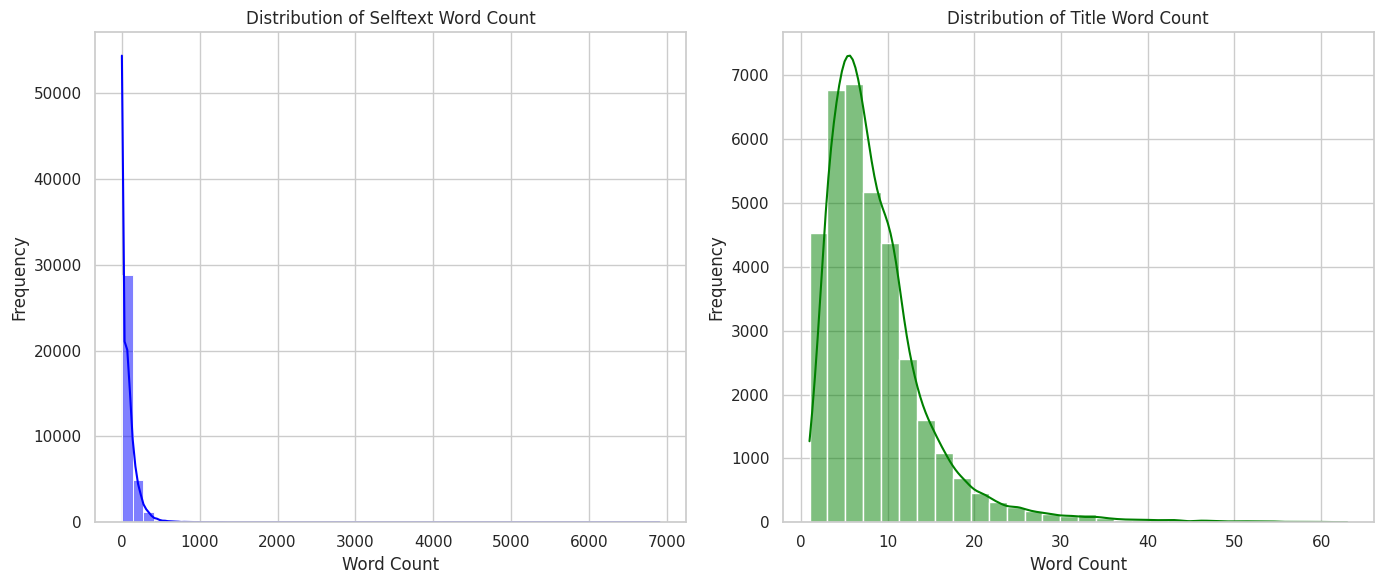

In [ ]:
# Set the style of seaborn plot
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution plot for 'selftext_word_count'
sns.histplot(df['selftext_word_count'], bins=50, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Distribution of Selftext Word Count')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')

# Distribution plot for 'title_word_count'
sns.histplot(df['title_word_count'], bins=30, ax=axes[1], kde=True, color='green')
axes[1].set_title('Distribution of Title Word Count')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Selftext Word Count Distribution:

The distribution is heavily right-skewed, indicating that while most selftexts are relatively short, there are some very lengthy posts.

Title Word Count Distribution:

This distribution is also somewhat right-skewed but less extreme than the selftext distribution.Most titles are brief, typically around 5 to 11 words, aligning with the quartile values.

## Text Data Analysis:

In [ ]:
# Replace '[removed]' and '[deleted]' with NaN
#data cleaning

import numpy as np
data_df['selftext'].replace(['[removed]', '[deleted]'], np.nan, inplace=True)
data_df.head(5)


<ipython-input-36-3344dcf65cef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['selftext'].replace(['[removed]', '[deleted]'], np.nan, inplace=True)


,author,created,link_flair_text,num_comments,over_18,score,selftext,subreddit_subscribers,title,upvote_ratio,subreddit
0,Sorry_Lettuce_507,2024-02-01 00:08:17,NaN,4,False,1,I’m from the U.S for whenever I travel it’s ve...,9372332,Can’t decide where to go,0.60,travel
1,RichardMeans,2024-02-01 00:16:18,Images,0,False,1,NaN,9372310,It a good day here,1.00,travel
2,Prudent_Storm_3781,2024-02-01 00:18:06,Question,52,False,4,I’m going to hit Rome and sorrento for two wee...,9372311,Italy advice…what to cut out? First trip,0.65,travel
3,wildchildplaygroup,2024-02-01 00:26:03,Question,1,False,1,NaN,9372289,Should I take Dukoral before Mexico trip?,1.00,travel
4,mirzaeian,2024-02-01 00:26:10,Question,11,False,0,I do travel a lot but I am not a fan of touris...,9372289,is there a map that I can find travel destinat...,0.44,travel


Title column

In [ ]:
from collections import Counter
import re

# Function to clean and split text
def clean_and_split_text(text):
    # Remove punctuation and numbers and convert text to lower case
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()
    # Split text into words
    words = text.split()
    return words

# Concatenate all titles into a single string
all_titles = ' '.join(data_df['title'].dropna())

# Clean and split the text
words_in_titles = clean_and_split_text(all_titles)

# Get the most common words
word_freq = Counter(words_in_titles)
most_common_words = word_freq.most_common(20)

# Print the 20 most common words
most_common_words

[('to', 10344),
 ('a', 7268),
 ('i', 6137),
 ('in', 5632),
 ('for', 5593),
 ('the', 4931),
 ('and', 4380),
 ('my', 4231),
 ('is', 3271),
 ('of', 3181),
 ('with', 3154),
 ('what', 2932),
 ('on', 2656),
 ('how', 2545),
 ('do', 2200),
 ('or', 2036),
 ('you', 1795),
 ('-', 1782),
 ('can', 1591),
 ('from', 1585)]

Removal of common English Words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


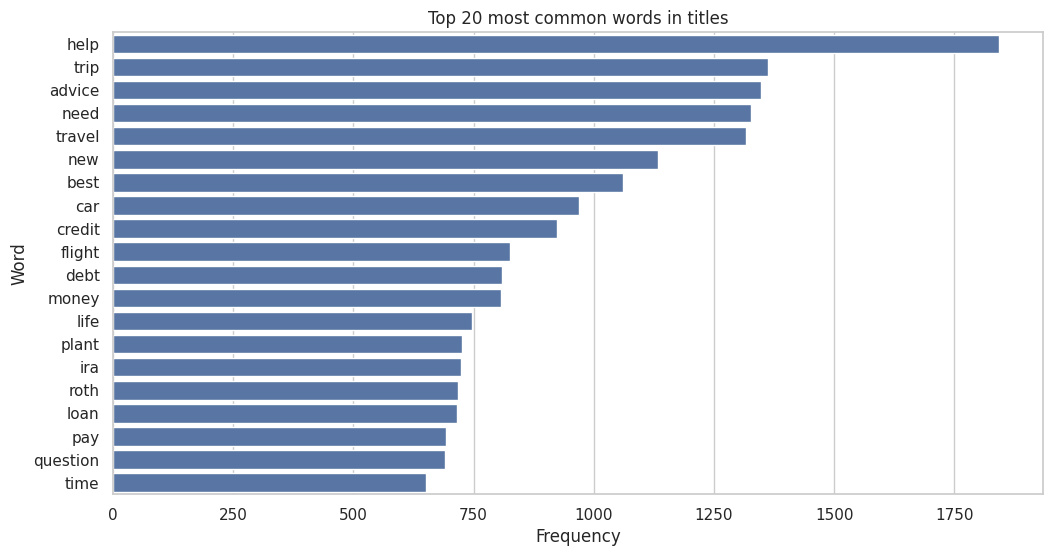

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Create a text data string for the 'title' column
text_data = ' '.join(data_df['title'].astype(str).tolist())

# Tokenize the text
tokens = word_tokenize(text_data)

# Convert to lower case
tokens = [word.lower() for word in tokens]

# Remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

# Remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

# Filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]

# Calculate frequency distribution
from nltk.probability import FreqDist
freq_dist = FreqDist(words)

# Convert to Pandas DataFrame for plotting
df_freq = pd.DataFrame(list(freq_dist.items()), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Plot the frequency distribution of the top 20 words
df_freq_head = df_freq.head(20)

# Plot using bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=df_freq_head)
plt.title('Top 20 most common words in titles')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


Selftext

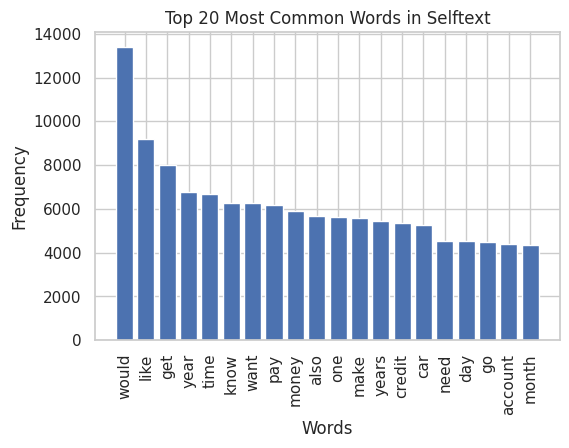

In [ ]:
from nltk import FreqDist
# Join all the non-null 'selftext' entries into a single string
all_selftext = ' '.join(data_df['selftext'].dropna())

# Tokenize the text
tokens = word_tokenize(all_selftext)

# Convert to lower case and remove non-alphabetic tokens
words = [word.lower() for word in tokens if word.isalpha()]

# Filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]

# Calculate the frequency of each word
freq_dist = FreqDist(words)

# Get the 20 most common words
common_words_selftext = freq_dist.most_common(20)

# Separate the words and their frequencies for plotting
words, frequencies = zip(*common_words_selftext)

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(words, frequencies)

# Add title and labels
plt.title('Top 20 Most Common Words in Selftext')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate the words on the x-axis so they don't overlap
plt.xticks(rotation=90)

# Show the plot
plt.show()


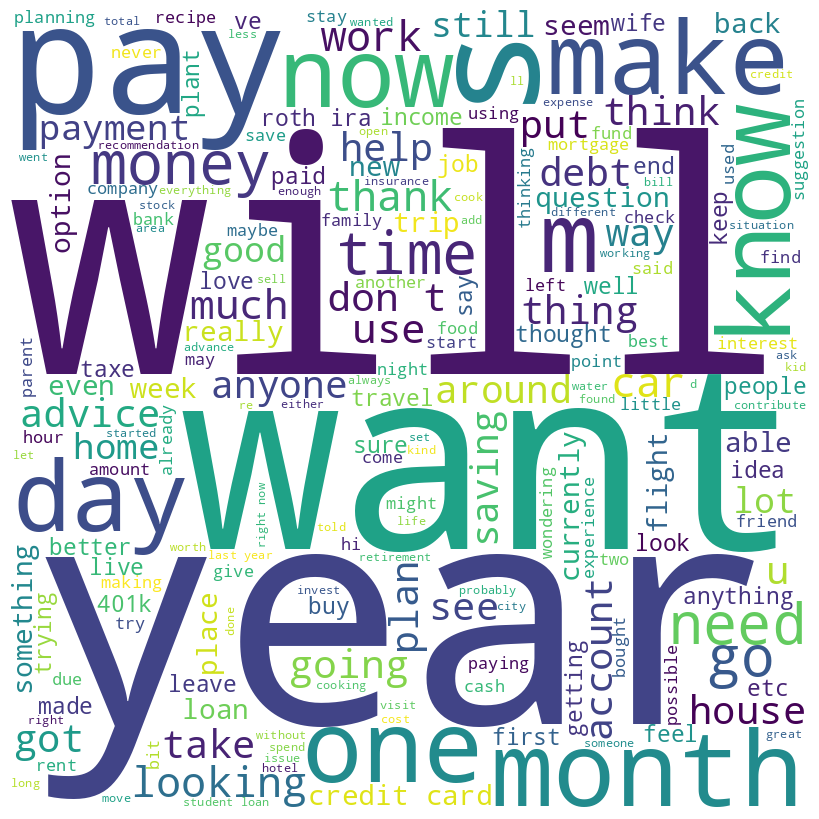

In [ ]:
from wordcloud import WordCloud

# Concatenate all selftexts into a single string, excluding NaN values
all_selftext = ' '.join(data_df['selftext'].dropna())

# Clean and split the text
words_in_selftext = clean_and_split_text(all_selftext)

# Create the WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white', stopwords = set(WordCloud().stopwords),min_font_size = 10).generate(' '.join(words_in_selftext))

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
from nltk.util import ngrams
# First, we'll need to download required NLTK resources if you haven't already.
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to preprocess and tokenize the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Remove tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha()]
    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

# Apply the preprocess function to the 'selftext' column
# and create a list of all words in all documents
words = []
data_df['selftext'].dropna().apply(lambda x: words.extend(preprocess_text(x)))

# Create bigrams and trigrams
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

# Count the frequency of each bigram and trigram
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Extract the 20 most common bigrams and trigrams
common_bigrams = bigram_freq.most_common(20)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
common_bigrams

[(('roth', 'ira'), 1638),
 (('credit', 'card'), 1618),
 (('would', 'like'), 1163),
 (('last', 'year'), 879),
 (('first', 'time'), 817),
 (('feel', 'like'), 809),
 (('credit', 'score'), 796),
 (('thanks', 'advance'), 795),
 (('student', 'loans'), 759),
 (('years', 'ago'), 677),
 (('per', 'month'), 597),
 (('interest', 'rate'), 578),
 (('credit', 'cards'), 575),
 (('would', 'love'), 573),
 (('emergency', 'fund'), 543),
 (('savings', 'account'), 507),
 (('years', 'old'), 506),
 (('seems', 'like'), 503),
 (('traditional', 'ira'), 474),
 (('card', 'debt'), 443)]

In [ ]:
common_trigrams = trigram_freq.most_common(20)
common_trigrams

[(('credit', 'card', 'debt'), 435),
 (('would', 'greatly', 'appreciated'), 247),
 (('long', 'story', 'short'), 184),
 (('please', 'let', 'know'), 148),
 (('want', 'make', 'sure'), 133),
 (('high', 'yield', 'savings'), 125),
 (('would', 'make', 'sense'), 99),
 (('would', 'love', 'hear'), 94),
 (('student', 'loan', 'debt'), 93),
 (('max', 'roth', 'ira'), 91),
 (('pay', 'credit', 'card'), 89),
 (('yield', 'savings', 'account'), 83),
 (('advice', 'would', 'appreciated'), 78),
 (('take', 'home', 'pay'), 78),
 (('would', 'like', 'know'), 75),
 (('https', 'https', 'https'), 74),
 (('ira', 'roth', 'ira'), 70),
 (('part', 'time', 'job'), 66),
 (('would', 'really', 'appreciate'), 63),
 (('advice', 'would', 'greatly'), 62)]

##Date and Time Analysis:

In [ ]:

# Ensure 'created' is in datetime format
data_df['created'] = pd.to_datetime(data_df['created'])

# Instead of modifying the original DataFrame, create a copy for time-based indexing
time_df = data_df.copy()
time_df.set_index('created', inplace=True)



<ipython-input-44-bc1934fda958>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['created'] = pd.to_datetime(data_df['created'])


In [ ]:
daily_data = time_df.resample('D').agg({
    'title': 'count',  # Number of posts
    'score': 'mean',   # Average score
    'num_comments': 'mean'  # Average number of comments
})

# Rename columns for clarity
daily_data.rename(columns={'title': 'num_posts', 'score': 'avg_score', 'num_comments': 'avg_num_comments'}, inplace=True)



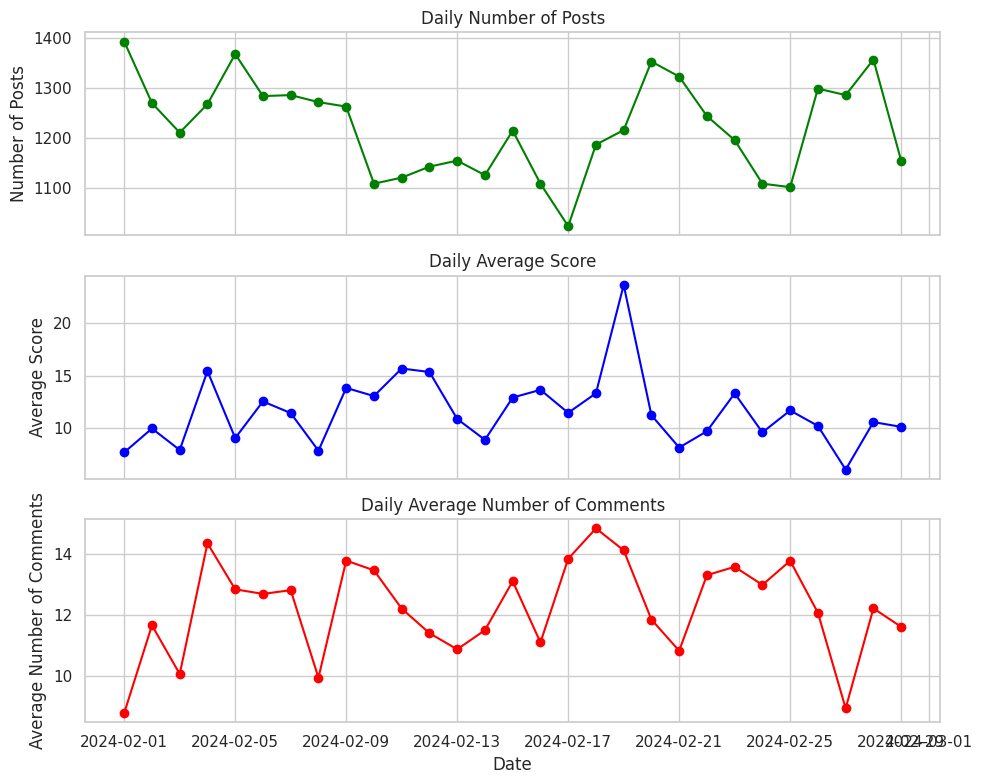

In [ ]:
# Create larger plots to enhance readability
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot the number of posts
axs[0].plot(daily_data.index, daily_data['num_posts'], color='green', marker='o', linestyle='-')
axs[0].set_title('Daily Number of Posts')
axs[0].set_ylabel('Number of Posts')
axs[0].grid(True)

# Plot the average score
axs[1].plot(daily_data.index, daily_data['avg_score'], color='blue', marker='o', linestyle='-')
axs[1].set_title('Daily Average Score')
axs[1].set_ylabel('Average Score')
axs[1].grid(True)

# Plot the average number of comments
axs[2].plot(daily_data.index, daily_data['avg_num_comments'], color='red', marker='o', linestyle='-')
axs[2].set_title('Daily Average Number of Comments')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Average Number of Comments')
axs[2].grid(True)

# Automatically adjust the subplot params for better layout
plt.tight_layout()

plt.show()



The main body of the post is **selftext**- the most informative feature for this task. You will extract features from this text using NLP techniques.

**The title** often summarizes the post and is rich in keywords that can be indicative of the subreddit.

**author**: In some cases, certain authors may post frequently to specific subreddits, so this could be a weak signal.

**created:** Time-based features may provide some signal if posting patterns are different across subreddits, though this is likely to be less informative than the text itself for our classification task.

**num_comments, score, upvote_ratio:** These features are generally outcomes of the subreddit. They are more likely to be post hoc characteristics rather than predictive features. However, in some instances, they might capture the level of engagement or popularity that is typical for certain subreddits.

**subreddit_subscribers:** While the size of the subreddit could be relevant, it's more of a characteristic of the subreddit than a feature that would help classify a post into a subreddit.